# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

# Create empty lists to append the API data into lists 
weather_data = {"City":[],
                "Cloudiness":[],
                "Country":[],
                "Date":[],
                "Humidity":[],
                "Lat":[],
                "Lng":[],
                "Max Temp":[],
                "Wind Speed": []}

# Get weather data
set_count = 1
record_count = 1

#setup loop
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
       
        # Delay 1 seconds between API calls
        time.sleep(1)
        
        # Reset record count  and increment set count after every 50 records
        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1 
        else:
            record_count = 0
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1
    else:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | berezhany
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | yar-sale
Processing Record 4 of Set 1 | abu samrah
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | russell
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | bluff
City not found. Skipping...
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | eureka
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | ilulissat
Processing Record 23 of Set 1 | kapaa
Processing Record 24 of Set 1 | ushuaia

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# create dataframe
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,berezhany,35,UA,1584526563,37,49.45,24.93,53.60,2.24
1,hilo,90,US,1584526405,83,19.73,-155.09,73.99,12.75
2,yar-sale,0,RU,1584526565,85,66.83,70.83,18.82,14.00
3,abu samrah,99,SY,1584526566,65,35.30,37.18,49.98,27.18
4,cherskiy,100,RU,1584526567,96,68.75,161.30,-9.42,5.35


In [12]:
# Exporting the city data into csv
weather_df.to_csv('weather_data.csv', encoding='utf-8', index=False)

In [13]:
#Find out basic data information 
# weather_df.describe()
weather_df.count()

City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Lat           584
Lng           584
Max Temp      584
Wind Speed    584
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [14]:
#Convert Column 'Date' to understandable data frame 
from datetime import datetime
from datetime import date

timestamp = weather_df.iloc[0, 3]

# Convert time stamp to date
data_date = date.fromtimestamp(timestamp)

# Format date in MM/DD/YY
formatted_date = data_date.strftime("%m/%d/%y")

#### Latitude vs. Temperature Plot

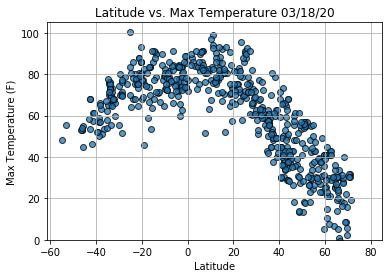

In [15]:
# Create scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.75, edgecolor="black")
plt.title(f"Latitude vs. Max Temperature {formatted_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("Output_Data/LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

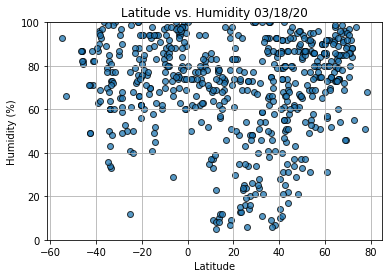

In [16]:
# Create scatter plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.75, edgecolor="black")
plt.title(f"Latitude vs. Humidity {formatted_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,100)
plt.grid(True)

plt.savefig("Output_Data/LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

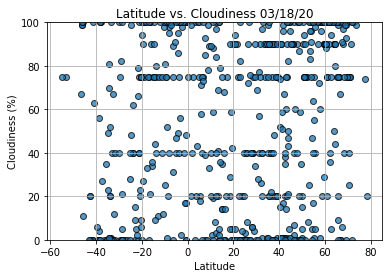

In [17]:
# Create scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.75, edgecolor="black")
plt.title(f"Latitude vs. Cloudiness {formatted_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,100)
plt.grid(True)

plt.savefig("Output_Data/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

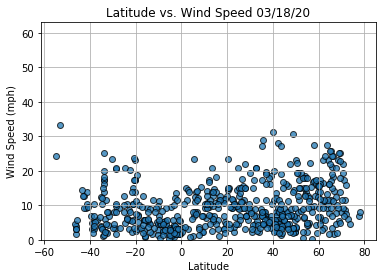

In [18]:
# Create scatter plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.75, edgecolor="black")
plt.title(f"Latitude vs. Wind Speed {formatted_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,63)
plt.grid(True)

plt.savefig("Output_Data/LatVsWindSpeed.png")
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots


In [20]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_df.loc[(weather_df["Lat"]>0),:]
south = weather_df.loc[(weather_df["Lat"]<0),:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8610539966702022


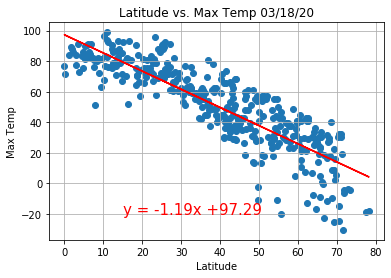

In [29]:
#Establish our X,Y Values & Regression Values
x = north['Lat']
y = north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Max Temp {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(15,-20),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_MaxTemp_Lat_North.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6023838436257523


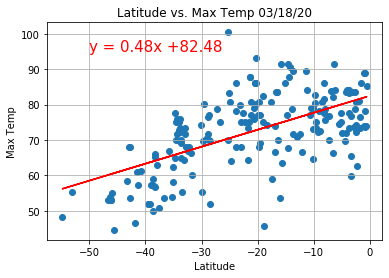

In [30]:
#Establish our X,Y Values & Regression Values
x = south['Lat']
y = south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Max Temp {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-50,95),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_MaxTemp_Lat_South.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2870693563005056


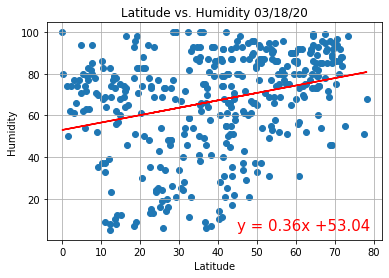

In [31]:
#Establish our X,Y Values & Regression Values
x = north['Lat']
y = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Humidity {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_Humidity_Lat_North.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17519222116178643


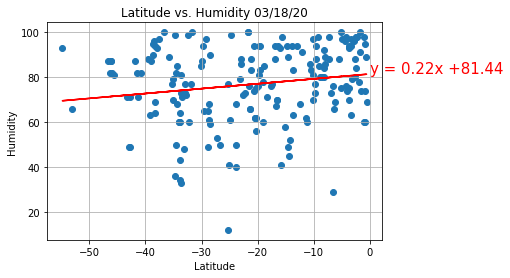

In [32]:
#Establish our X,Y Values & Regression Values
x = south['Lat']
y = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Humidity {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(0,82),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_Humidity_Lat_South.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25166798738882573


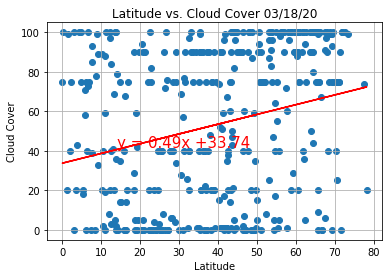

In [40]:
#Establish our X,Y Values & Regression Values
x = north['Lat']
y = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Cloud Cover {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.annotate(line_eq,(14,42),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_Cloudiness_Lat_North.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3600056321642834


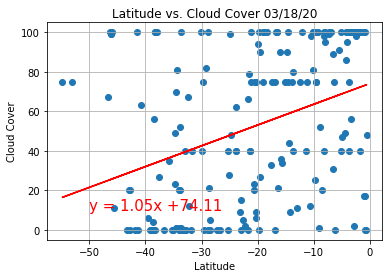

In [41]:
#Establish our X,Y Values & Regression Values
x = south['Lat']
y = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Cloud Cover {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_Cloudiness_Lat_South.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18782586085380829


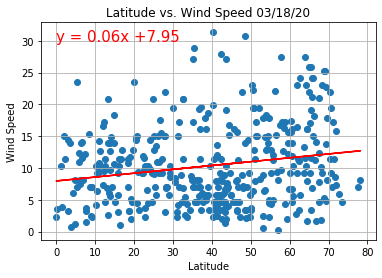

In [42]:
#Establish our X,Y Values &Regression Values
x_values = north['Lat']
y_values = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Wind Speed {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_WindSpeed_Lat_North.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3397771212154708


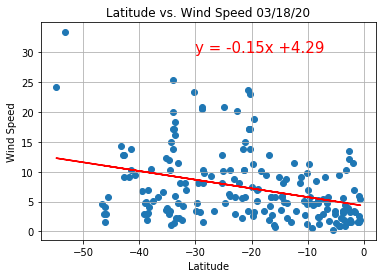

In [43]:
#Establish our X,Y Values &Regression Values
x_values = south['Lat']
y_values = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(f"Latitude vs. Wind Speed {formatted_date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("Output_Data/LinearReg_WindSpeed_Lat_South.png")
plt.show()